<a href="https://colab.research.google.com/github/IndoNLP/nusax/blob/main/code/notebook/sentiment_analysis_nusax_classical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A code to train sentiment analysis for NusaX dataset.

Simply `runtime > run all` to train and test.
Modify the language on the bottom part of this code.

任务 1: 数据加载机制

任务 3: 情感分析任务
模型实现 (SVM, MLP, CNN, Transformer)

In [10]:
# grab the data first
!git clone https://github.com/IndoNLP/nusax.git

fatal: destination path 'nusax' already exists and is not an empty directory.


Step 2: Load the Data

In [77]:
import pandas as pd
from nltk import word_tokenize
import nltk
import pandas as pd
import os

nltk.download('punkt')

# read csv data
# return a pair of (list of data, list of label)
# also tokenize the input first
def load_data(filedir):
    df = pd.read_csv(filedir)
    data = list(df['text'])
    data = [" ".join(word_tokenize(sent)) for sent in data]
    return (data, list(df['label']))

[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


In [78]:
# Verify the path
base_dir = "./nusax/datasets/sentiment"
lang = "indonesian"  # You can change this to 'javanese' as needed
# lang = "javanese"
train_path = os.path.join(base_dir, lang, "train.csv")
valid_path = os.path.join(base_dir, lang, "valid.csv")
test_path = os.path.join(base_dir, lang, "test.csv")

# Load train, validation, and test data
x_train, y_train = load_data(train_path)
x_valid, y_valid = load_data(valid_path)
x_test, y_test = load_data(test_path)

print(f"Loaded {len(x_train)} training samples, {len(x_valid)} validation samples, {len(x_test)} test samples.")

Loaded 500 training samples, 100 validation samples, 400 test samples.


Step 3: Machine Translation

In [5]:
!git clone https://huggingface.co/Helsinki-NLP/opus-mt-id-en

Cloning into 'opus-mt-id-en'...
fatal: unable to access 'https://huggingface.co/Helsinki-NLP/opus-mt-id-en/': Could not resolve host: huggingface.co


In [8]:
# try:
#     tokenizer = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-id-en')
#     model = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-id-en')
# except Exception as e:
#     print("Error:", e)

Error: Can't load tokenizer for 'Helsinki-NLP/opus-mt-id-en'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'Helsinki-NLP/opus-mt-id-en' is the correct path to a directory containing all relevant files for a MarianTokenizer tokenizer.


In [ ]:
# from transformers import MarianMTModel, MarianTokenizer

# # Translation function
# def translate(texts, src_lang, tgt_lang):
#     model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"
#     tokenizer = MarianTokenizer.from_pretrained(model_name)
#     model = MarianMTModel.from_pretrained(model_name)
#     inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
#     translated_tokens = model.generate(**inputs)
#     translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
#     return translations

# # Example translations
# texts = ["Selamat pagi! Bagaimana kabarmu?"]
# print("Indonesian to English:", translate(texts, "id", "en"))
# print("Indonesian to Javanese:", translate(texts, "id", "jv"))

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# 指定本地路径
local_opus_model_path = "./opus-mt-id-en"  # 保存模型文件的路径

# 加载本地模型和tokenizer
tokenizer = MarianTokenizer.from_pretrained(local_opus_model_path)
model = MarianMTModel.from_pretrained(local_opus_model_path)

# 示例翻译
texts = ["Selamat pagi! Bagaimana kabarmu?"]

inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
translated_tokens = model.generate(**inputs)
translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
print("Indonesian to English:", translations)

d:\Anaconda3\envs\AI\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
d:\Anaconda3\envs\AI\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Indonesian to English: ['Good morning!']


In [ ]:
# ## Encode ##
# from indobenchmark.src.indobenchmark.tokenization_indonlg import IndoNLGTokenizer
# tokenizer = IndoNLGTokenizer.from_pretrained('./indobart')
# inputs = tokenizer.prepare_input_for_generation('hai, bagaimana kabar', return_tensors='pt', 
#                        lang_token = '[indonesian]', decoder_lang_token='[indonesian]')
# # inputs: {'input_ids': tensor([    0,  4693, 39956,  1119,  3447,     2, 40002]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1])}

# ## Decode ##
# from indobenchmark.src.indobenchmark.tokenization_indonlg import IndoNLGTokenizer
# tokenizer = IndoNLGTokenizer.from_pretrained('./indobart')
# text = tokenizer.decode([0,  4693, 39956,  1119,  3447, 2, 40002])
# # text: '<s> hai, bagaimana kabar </s> [indonesian]'

In [ ]:
# Load model directly
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobart")
# model = AutoModelForSeq2SeqLM.from_pretrained("indobenchmark/indobart")

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
#from indobenchmark_toolkit import IndoNLGTokenizer
from indobenchmark.src.indobenchmark.tokenization_indonlg import IndoNLGTokenizer

# 指定本地路径，确保路径正确
local_indobart_model_path = "./indobart"  # 这是你保存模型文件的路径

# # 使用 AutoTokenizer 加载模型
# tokenizer = AutoTokenizer.from_pretrained(local_indobart_model_path)
# model = AutoModelForSeq2SeqLM.from_pretrained(local_indobart_model_path)
tokenizer = IndoNLGTokenizer.from_pretrained('./indobart')
model = AutoModelForSeq2SeqLM.from_pretrained(local_indobart_model_path)

# 翻译函数
def translate(texts, src_lang, tgt_lang):
    # 处理输入文本
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    
    # 解码输出
    translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
    return translations

# 示例翻译
#texts = ["Selamat pagi! Bagaimana kabarmu?"]  # 这是印尼语文本
texts = ["Iya benar, dia sedang jaga warung."]  
# 印度尼西亚语到爪哇语翻译
translations = translate(texts, "id", "jv")
print("Indonesian to Javanese:", translations)# Iya bener, deknen lagi jaga warung.

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
d:\Anaconda3\envs\AI\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Indonesian to Javanese: [' benar, dia sedang jaga warung.']


Step 4: Sentiment Analysis Models

(a) SVM Model

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from scipy.sparse import vstack

import numpy as np

SVM Model Results:
              precision    recall  f1-score   support

    negative       0.74      0.82      0.77       153
     neutral       0.77      0.60      0.68        96
    positive       0.86      0.88      0.87       151

    accuracy                           0.79       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.79      0.79      0.79       400



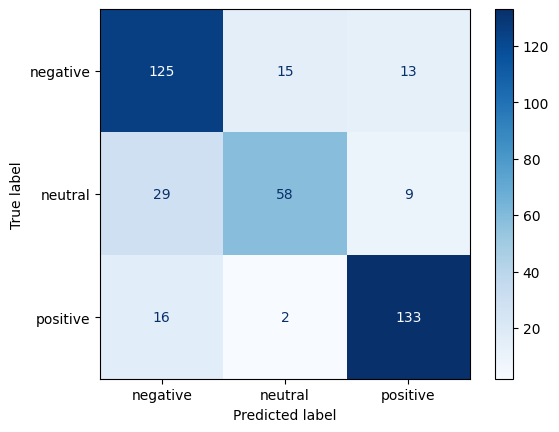

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Train SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(x_train_vec, y_train)
y_pred_svm = svm_model.predict(x_test_vec)

# Evaluate SVM model
print("SVM Model Results:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_).plot(cmap=plt.cm.Blues)
plt.show()

(b) MLP Model

MLP Model Results:
              precision    recall  f1-score   support

    negative       0.73      0.78      0.76       153
     neutral       0.79      0.59      0.68        96
    positive       0.80      0.87      0.84       151

    accuracy                           0.77       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.77      0.77      0.77       400



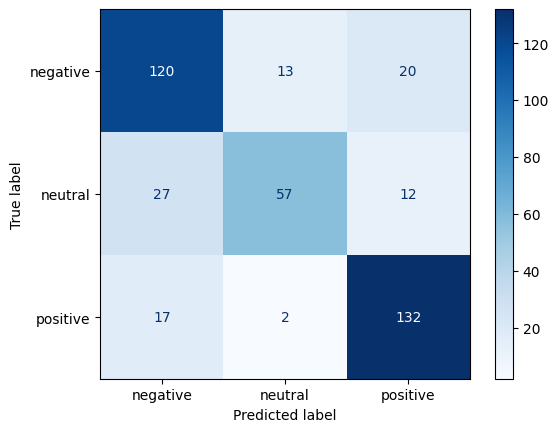

In [83]:
from sklearn.neural_network import MLPClassifier

# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_model.fit(x_train_vec, y_train)
y_pred_mlp = mlp_model.predict(x_test_vec)

# Evaluate MLP model
print("MLP Model Results:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm, display_labels=mlp_model.classes_).plot(cmap=plt.cm.Blues)
plt.show()


(c) VADER Sentiment Analysis

In [ ]:
# Install the vaderSentiment package
%pip install vaderSentiment


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

vader_scores = [analyzer.polarity_scores(text)['compound'] for text in x_test]
vader_predictions = ['positive' if score >= 0 else 'negative' for score in vader_scores]
vader_accuracy = accuracy_score(y_test, vader_predictions)
print("VADER Accuracy:", vader_accuracy)

# Example analysis
sentence = "Saya sangat bahagia hari ini!"
scores = analyzer.polarity_scores(sentence)
print("VADER Sentiment Analysis Results:", scores)

VADER Accuracy: 0.3725
VADER Sentiment Analysis Results: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
# # from transformers import pipeline

# # # 使用多语言情感分析模型
# # classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# # # 示例分析
# # sentence = "Saya sangat bahagia hari ini!"
# # result = classifier(sentence)
# # print("Multilingual Sentiment Analysis Results:", result)

# import os
# # 执行上面脚本时，请设置环境变量：
# os.environ['HF_ENDPOINT'] = 'https://hf-api.gitee.com'
# os.environ['HF_HOME'] = os.path.expanduser('~/.cache/gitee-ai')
# # 使用 pipeline 作为高级 helper
# from transformers import pipeline
# import os
# classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# # 示例分析
# sentence = "Saya sangat bahagia hari ini!"
# result = classifier(sentence)
# print("Multilingual Sentiment Analysis Results:", result)

OSError: nlptown/bert-base-multilingual-uncased-sentiment does not appear to have a file named config.json. Checkout 'https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/None' for available files.

(d) Word2Vec Feature Extraction

In [ ]:
%pip install gensim

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score

# Word2Vec 模型
sentences = [sentence.split() for sentence in x_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

existing_word = None
for sentence in sentences:
    for word in sentence:
        if word in w2v_model.wv:
            existing_word = word
            break
    if existing_word:
        break

if existing_word:
    print(f"Word vector for '{existing_word}':", w2v_model.wv[existing_word])
else:
    print("No words from training data found in Word2Vec model.")

Word 'bahagia' not found in Word2Vec model.
Word vector for 'Nikmati': [ 6.8146070e-03  6.0672848e-03 -1.8707888e-03  4.8479354e-03
  8.5083442e-03 -9.5655611e-03  6.1569540e-03 -2.7188968e-03
  6.0531688e-03 -4.8219208e-03  1.4235022e-03 -3.1412388e-03
  7.1559427e-04 -8.2007758e-03  8.9919642e-03 -8.6563388e-03
 -5.8445917e-04  5.9282314e-03  3.8833809e-03 -1.0125008e-02
  3.0366349e-04 -4.7497516e-03 -1.5312992e-03 -3.5047638e-03
  4.7355769e-03 -8.1007211e-03  1.5372846e-03  7.3546073e-03
 -7.6544029e-03 -2.7526040e-03  9.5673827e-03  8.0706775e-03
  6.0391012e-03 -8.2248710e-03 -4.6889442e-03 -7.2263367e-03
  6.2613185e-03  5.9839762e-03  8.8198083e-03 -7.9726195e-03
 -6.1144278e-04  1.8835621e-04  4.7991253e-03  2.8705029e-03
 -2.4305128e-03 -4.4923420e-03 -7.7890689e-03  5.7113478e-03
 -9.3732486e-03 -2.4136908e-03  7.4950038e-03 -1.0041270e-02
 -2.9824236e-03  9.4214836e-03 -7.8437021e-03  8.0242427e-03
  5.3944178e-03 -9.5012505e-03 -8.3937449e-03 -8.4753064e-03
 -4.3251803e-0

Step 5: Transformer Model for Sentiment Analysis

In [87]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load pretrained model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Example sentiment analysis
text = "Saya sangat bahagia hari ini!"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
predicted_class = torch.argmax(outputs.logits, dim=1)
print("Transformer Sentiment Analysis Result:", predicted_class)


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like distilbert-base-uncased-finetuned-sst-2-english is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.